In [1]:
# %pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## Exp-1 MP Neuron


In [5]:
# MP Neuron function
def mp_neuron(x, w, threshold):
    """McCulloch-Pitts Neuron: Returns 1 if weighted sum >= threshold, else 0"""
    return 1 if np.dot(x, w) >= threshold else 0

# Perceptron class
class Perceptron:
    def __init__(self, n_inputs, lr=0.1, epochs=10):
        self.w = np.zeros(n_inputs + 1)  # weights + bias
        self.lr = lr
        self.epochs = epochs
    
    def predict(self, x):
        z = np.dot(x, self.w[1:]) + self.w[0]
        return 1 if z >= 0 else 0
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                error = target - pred
                self.w[1:] += self.lr * error * xi
                self.w[0] += self.lr * error

# Dataset (AND gate)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

print("="*50)
print("AND GATE IMPLEMENTATION")
print("="*50)

# MP Neuron test
mp_weights = np.array([1, 1])
mp_threshold = 2
print("\nMP Neuron outputs:")
print("-"*30)
for xi, yi in zip(X, y):
    output = mp_neuron(xi, mp_weights, mp_threshold)
    print(f"Input: {xi}, Expected: {yi}, Output: {output}")

# Train Perceptron
print("\n" + "="*50)
print("PERCEPTRON TRAINING")
print("="*50)
p = Perceptron(n_inputs=2, lr=0.1, epochs=10)
p.fit(X, y)

print(f"\nLearned weights: {p.w[1:]}")
print(f"Learned bias: {p.w[0]}")

print("\nPerceptron outputs after training:")
print("-"*30)
for xi, yi in zip(X, y):
    output = p.predict(xi)
    print(f"Input: {xi}, Expected: {yi}, Output: {output}")

# Calculate accuracy
predictions = [p.predict(xi) for xi in X]
accuracy = sum([1 for pred, true in zip(predictions, y) if pred == true]) / len(y)
print(f"\nAccuracy: {accuracy * 100:.1f}%")

AND GATE IMPLEMENTATION

MP Neuron outputs:
------------------------------
Input: [0 0], Expected: 0, Output: 0
Input: [0 1], Expected: 0, Output: 0
Input: [1 0], Expected: 0, Output: 0
Input: [1 1], Expected: 1, Output: 1

PERCEPTRON TRAINING

Learned weights: [0.2 0.1]
Learned bias: -0.20000000000000004

Perceptron outputs after training:
------------------------------
Input: [0 0], Expected: 0, Output: 0
Input: [0 1], Expected: 0, Output: 0
Input: [1 0], Expected: 0, Output: 0
Input: [1 1], Expected: 1, Output: 1

Accuracy: 100.0%


## Exp-2 Sigmoid Neuron on Iris

In [8]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sigmoid Neuron (Logistic Regression) class
class SigmoidNeuron:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        
        for epoch in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = sigmoid(z)
            error = y - y_pred
            
            # Gradient ascent (since we're maximizing likelihood)
            self.w += self.lr * np.dot(X.T, error) / len(y)
            self.b += self.lr * error.mean()
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return (sigmoid(z) >= 0.5).astype(int)
    
    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

# Load Iris dataset
print("="*60)
print("SIGMOID NEURON ON IRIS DATASET")
print("="*60)

data = load_iris()
X = data.data[:, :2]  # Use first two features for simplicity
y = (data.target == 2).astype(int)  # Iris-Virginica = 1, others = 0

print(f"\nDataset Info:")
print(f"  Total samples: {len(X)}")
print(f"  Features used: {data.feature_names[:2]}")
print(f"  Class distribution: Virginica={y.sum()}, Others={len(y)-y.sum()}")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTrain/Test Split:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Sigmoid Neuron
print(f"\nTraining Sigmoid Neuron...")
print(f"  Learning rate: 0.1")
print(f"  Epochs: 1000")

model = SigmoidNeuron(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

print(f"\nLearned Parameters:")
print(f"  Weights: {model.w}")
print(f"  Bias: {model.b:.4f}")

# Predict and evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"\n" + "="*60)
print("RESULTS")
print("="*60)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Show some predictions
print(f"\nSample Predictions on Test Set (first 10):")
print("-"*60)
print(f"{'Actual':<10} {'Predicted':<12} {'Probability':<12}")
print("-"*60)
for i in range(min(10, len(y_test))):
    prob = model.predict_proba(X_test[i:i+1])[0]
    print(f"{y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]:<10} {y_pred_test[i]:<12} {prob:.4f}")

# Confusion Matrix
true_pos = np.sum((y_test == 1) & (y_pred_test == 1))
true_neg = np.sum((y_test == 0) & (y_pred_test == 0))
false_pos = np.sum((y_test == 0) & (y_pred_test == 1))
false_neg = np.sum((y_test == 1) & (y_pred_test == 0))

print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"               0        1")
print(f"Actual 0    {true_neg:4d}    {false_pos:4d}")
print(f"       1    {false_neg:4d}    {true_pos:4d}")

SIGMOID NEURON ON IRIS DATASET

Dataset Info:
  Total samples: 150
  Features used: ['sepal length (cm)', 'sepal width (cm)']
  Class distribution: Virginica=50, Others=100

Train/Test Split:
  Training samples: 105
  Test samples: 45

Training Sigmoid Neuron...
  Learning rate: 0.1
  Epochs: 1000

Learned Parameters:
  Weights: [ 2.05600745 -0.14674265]
  Bias: -1.0124

RESULTS
Training Accuracy: 80.00%
Test Accuracy: 82.22%

Sample Predictions on Test Set (first 10):
------------------------------------------------------------
Actual     Predicted    Probability 
------------------------------------------------------------
0          0            0.4253
0          0            0.1618
1          1            0.9767
0          0            0.3579
0          1            0.8076
0          0            0.0955
0          0            0.1714
1          1            0.8287
0          1            0.5394
0          0            0.2670

Confusion Matrix:
                 Predicted
           

## Exp-3 FFN in Multi-class Classification


FEEDFORWARD NEURAL NETWORK - MULTI-CLASS CLASSIFICATION

Original Training Data:
X shape: (8, 2)
Y shape: (8,)
Classes: [0 1 2]

Normalized Training Data (mean=0, std=1)

Initializing FFN:
  Input size: 2
  Hidden size: 5
  Output size: 3
  Learning rate: 0.1

Training for 5000 epochs...
Epoch 1000/5000, Loss: 0.3689
Epoch 2000/5000, Loss: 0.2500
Epoch 3000/5000, Loss: 0.2110
Epoch 4000/5000, Loss: 0.1930
Epoch 5000/5000, Loss: 0.1634

TRAINING RESULTS
Training Loss: 0.1633
Training Accuracy: 100.00%


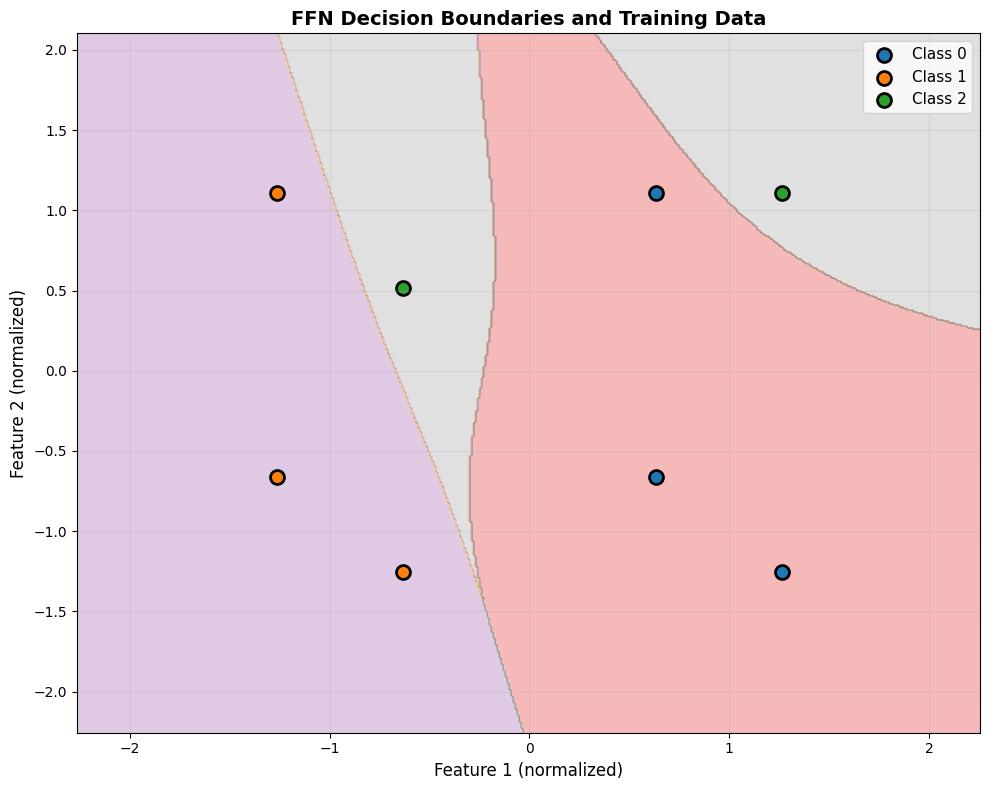


TEST DATA EVALUATION
Original test data:
[[ 0  0]
 [ 1  1]
 [-1 -1]]

Normalized test data:
[[ 0.         -0.07392213]
 [ 0.63245553  0.51745489]
 [-0.63245553 -0.66529914]]

Predictions on test data points: [0 0 1]
Actual labels: [0 2 1]

Test Loss: 0.5097
Test Accuracy: 66.67%

DETAILED TEST PREDICTIONS

Test point 1: [0 0]
  Probabilities: Class 0=0.8048, Class 1=0.0003, Class 2=0.1949
  Predicted: 0, Actual: 0, ✓

Test point 2: [1 1]
  Probabilities: Class 0=0.7070, Class 1=0.0000, Class 2=0.2929
  Predicted: 0, Actual: 2, ✗

Test point 3: [-1 -1]
  Probabilities: Class 0=0.0113, Class 1=0.9194, Class 2=0.0693
  Predicted: 1, Actual: 1, ✓


In [5]:
# Feedforward Neural Network class
class FFN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def cross_entropy(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[np.arange(m), np.argmax(y_true, axis=1)] + 1e-10)
        return np.sum(log_likelihood) / m
    
    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=1000):
        # Convert labels to one-hot encoding
        y_onehot = np.zeros((y.shape[0], self.output_size))
        y_onehot[np.arange(y.shape[0]), y] = 1
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Backward pass
            self.backward(X, y_onehot, y_pred)
            
            # Print loss every 1000 epochs
            if (epoch + 1) % 1000 == 0:
                loss = self.cross_entropy(y_onehot, y_pred)
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    
    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)


# Training data: 3 classes, 2 features
x_train = np.array([
    [1, 2],
    [1, -1],
    [-1, -2],
    [-2, -1],
    [2, 2],
    [-1, 1],
    [-2, 2],
    [2, -2]
])
y_train = np.array([0, 0, 1, 1, 2, 2, 1, 0])

print("="*60)
print("FEEDFORWARD NEURAL NETWORK - MULTI-CLASS CLASSIFICATION")
print("="*60)
print(f"\nOriginal Training Data:")
print(f"X shape: {x_train.shape}")
print(f"Y shape: {y_train.shape}")
print(f"Classes: {np.unique(y_train)}")

# Store mean and std for later use on test data
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)

# Normalize features
x_train = (x_train - x_mean) / x_std

print(f"\nNormalized Training Data (mean=0, std=1)")

# Create and train FFN
print(f"\nInitializing FFN:")
print(f"  Input size: 2")
print(f"  Hidden size: 5")
print(f"  Output size: 3")
print(f"  Learning rate: 0.1")
print(f"\nTraining for 5000 epochs...")

ffn = FFN(input_size=2, hidden_size=5, output_size=3, learning_rate=0.1)
ffn.train(x_train, y_train, epochs=5000)

# Calculate and print accuracy and loss on training data
y_train_onehot = np.zeros((y_train.shape[0], ffn.output_size))
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1
train_predictions_proba = ffn.forward(x_train)
train_loss = ffn.cross_entropy(y_train_onehot, train_predictions_proba)
train_predictions = np.argmax(train_predictions_proba, axis=1)
train_accuracy = np.mean(train_predictions == y_train)

print(f"\n" + "="*60)
print("TRAINING RESULTS")
print("="*60)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Create mesh grid for decision boundary visualization
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_hstack = np.c_[xx.ravel(), yy.ravel()]
Z = ffn.predict(grid_hstack)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Plot training data points with labels
for class_value in np.unique(y_train):
    plt.scatter(x_train[y_train==class_value, 0],
                x_train[y_train==class_value, 1], 
                label=f"Class {class_value}",
                s=100, edgecolors='black', linewidths=2)

plt.title("FFN Decision Boundaries and Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1 (normalized)", fontsize=12)
plt.ylabel("Feature 2 (normalized)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Predictions on test data points
x_test = np.array([[0, 0], [1, 1], [-1, -1]])
y_test = np.array([0, 2, 1])  # Define true labels for the test points

print(f"\n" + "="*60)
print("TEST DATA EVALUATION")
print("="*60)
print(f"Original test data:")
print(x_test)

# Normalize test data using the mean and std of the training data
x_test_normalized = (x_test - x_mean) / x_std

print(f"\nNormalized test data:")
print(x_test_normalized)

# Calculate and print predictions
predictions = ffn.predict(x_test_normalized)
print(f"\nPredictions on test data points: {predictions}")
print(f"Actual labels: {y_test}")

# Calculate and print accuracy and loss on test data
y_test_onehot = np.zeros((y_test.shape[0], ffn.output_size))
y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1
test_predictions_proba = ffn.forward(x_test_normalized)
test_loss = ffn.cross_entropy(y_test_onehot, test_predictions_proba)
test_accuracy = np.mean(predictions == y_test)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Show prediction probabilities
print(f"\n" + "="*60)
print("DETAILED TEST PREDICTIONS")
print("="*60)
for i, (pred, true) in enumerate(zip(predictions, y_test)):
    probs = test_predictions_proba[i]
    print(f"\nTest point {i+1}: {x_test[i]}")
    print(f"  Probabilities: Class 0={probs[0]:.4f}, Class 1={probs[1]:.4f}, Class 2={probs[2]:.4f}")
    print(f"  Predicted: {pred}, Actual: {true}, {'✓' if pred == true else '✗'}")


## EXP-4


LINEAR REGRESSION WITH STOCHASTIC GRADIENT DESCENT

Generating synthetic data...
  Data shape: (100, 1)
  Target shape: (100,)
  True relationship: y = 3x + 4 + noise

TRAINING MODEL
  Learning rate: 0.01
  Number of epochs: 50

Learned parameters:
  Weight (slope): 2.8172
  Bias (intercept): 4.2405
  Final training loss: 0.8122

PREDICTIONS ON TEST DATA

Input      Predicted       Expected (approx.)  
---------------------------------------------
0.0        4.24            4.0                 
1.0        7.06            7.0                 
2.0        9.87            10.0                

Mean Absolute Error on test set: 0.1411

GENERATING VISUALIZATIONS


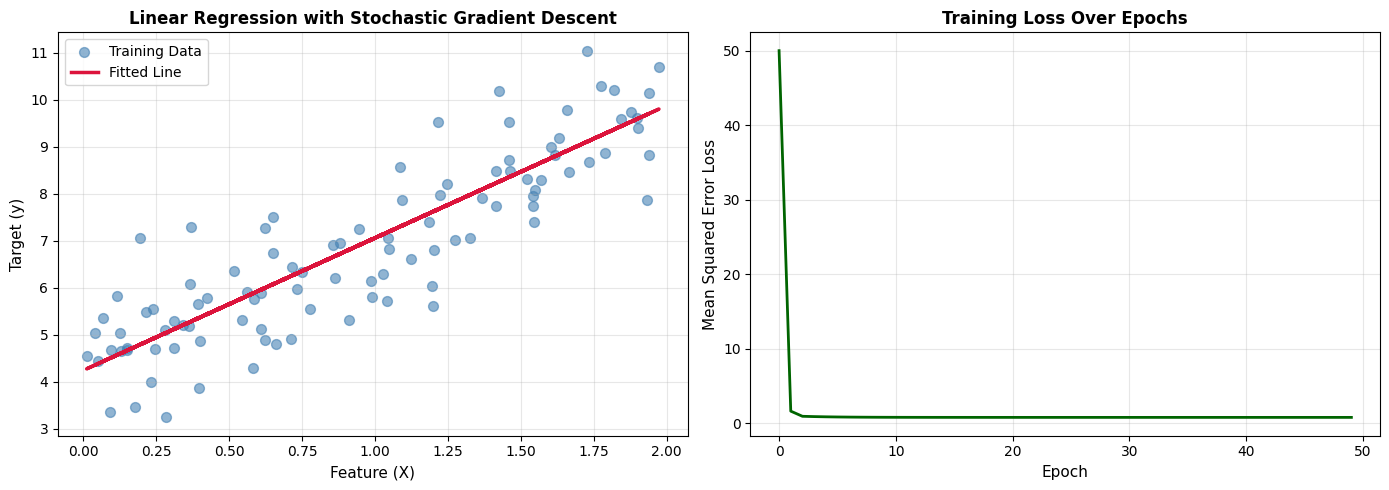


SUMMARY
✓ Model successfully trained on 100 samples
✓ Learned equation: y = 2.817x + 4.241
✓ True equation: y = 3x + 4
✓ Training converged with final loss: 0.8122


In [2]:
import numpy as np
import matplotlib.pyplot as plt


class StochasticGradientDescentRegressor:
    """
    Linear Regression using Stochastic Gradient Descent.
    Updates weights after each training sample.
    """
    
    def __init__(self, learning_rate=0.01, num_epochs=100):
        """
        Initialize the SGD regressor.
        
        Parameters:
        -----------
        learning_rate : float
            Step size for gradient descent updates
        num_epochs : int
            Number of complete passes through the training data
        """
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        self.training_losses = []
    
    def fit(self, features_train, targets_train):
        """
        Train the linear regression model using SGD.
        
        Parameters:
        -----------
        features_train : ndarray of shape (num_samples, num_features)
            Training feature matrix
        targets_train : ndarray of shape (num_samples,)
            Training target values
        """
        num_samples, num_features = features_train.shape
        
        # Initialize parameters to zero
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Training loop over epochs
        for epoch_idx in range(self.num_epochs):
            # Calculate epoch loss for monitoring
            predictions_epoch = np.dot(features_train, self.weights) + self.bias
            mse_loss = np.mean((predictions_epoch - targets_train) ** 2)
            self.training_losses.append(mse_loss)
            
            # Stochastic updates: iterate through each sample
            for sample_idx in range(num_samples):
                # Get single training sample
                feature_vector = features_train[sample_idx]
                true_target = targets_train[sample_idx]
                
                # Forward pass: compute prediction
                predicted_value = np.dot(feature_vector, self.weights) + self.bias
                
                # Compute prediction error
                prediction_error = predicted_value - true_target
                
                # Backward pass: compute gradients and update parameters
                # Gradient w.r.t weights: dL/dw = 2 * error * x (factor of 2 absorbed in learning rate)
                gradient_weights = prediction_error * feature_vector
                self.weights -= self.learning_rate * gradient_weights
                
                # Gradient w.r.t bias: dL/db = 2 * error (factor of 2 absorbed in learning rate)
                gradient_bias = prediction_error
                self.bias -= self.learning_rate * gradient_bias
    
    def predict(self, features_input):
        """
        Make predictions using the trained model.
        
        Parameters:
        -----------
        features_input : ndarray of shape (num_samples, num_features)
            Input features for prediction
            
        Returns:
        --------
        predictions : ndarray of shape (num_samples,)
            Predicted target values
        """
        return np.dot(features_input, self.weights) + self.bias


def generate_synthetic_data(num_samples=100, true_slope=3, true_intercept=4, noise_level=1.0, random_seed=42):
    """
    Generate synthetic linear regression data with noise.
    
    Parameters:
    -----------
    num_samples : int
        Number of data points to generate
    true_slope : float
        True slope of the linear relationship
    true_intercept : float
        True y-intercept of the linear relationship
    noise_level : float
        Standard deviation of Gaussian noise
    random_seed : int
        Seed for reproducibility
        
    Returns:
    --------
    features : ndarray of shape (num_samples, 1)
        Input features
    targets : ndarray of shape (num_samples,)
        Target values with noise
    """
    np.random.seed(random_seed)
    features = 2 * np.random.rand(num_samples, 1)
    targets = true_slope * features.flatten() + true_intercept + noise_level * np.random.randn(num_samples)
    return features, targets


def visualize_regression_results(features, targets, model):
    """
    Create visualization of regression results.
    
    Parameters:
    -----------
    features : ndarray
        Training features
    targets : ndarray
        Training targets
    model : StochasticGradientDescentRegressor
        Trained model
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Data points and fitted line
    ax1.scatter(features, targets, color='steelblue', alpha=0.6, s=50, label='Training Data')
    ax1.plot(features, model.predict(features), color='crimson', linewidth=2.5, label='Fitted Line')
    ax1.set_xlabel('Feature (X)', fontsize=11)
    ax1.set_ylabel('Target (y)', fontsize=11)
    ax1.set_title('Linear Regression with Stochastic Gradient Descent', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Training loss over epochs
    ax2.plot(range(len(model.training_losses)), model.training_losses, color='darkgreen', linewidth=2)
    ax2.set_xlabel('Epoch', fontsize=11)
    ax2.set_ylabel('Mean Squared Error Loss', fontsize=11)
    ax2.set_title('Training Loss Over Epochs', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# ============================================================
# MAIN EXECUTION
# ============================================================

if __name__ == "__main__":
    print("="*70)
    print("LINEAR REGRESSION WITH STOCHASTIC GRADIENT DESCENT")
    print("="*70)
    
    # Generate synthetic data: y = 3x + 4 + noise
    print("\nGenerating synthetic data...")
    features_train, targets_train = generate_synthetic_data(
        num_samples=100,
        true_slope=3,
        true_intercept=4,
        noise_level=1.0,
        random_seed=42
    )
    
    print(f"  Data shape: {features_train.shape}")
    print(f"  Target shape: {targets_train.shape}")
    print(f"  True relationship: y = 3x + 4 + noise")
    
    # Initialize and train model
    print("\n" + "="*70)
    print("TRAINING MODEL")
    print("="*70)
    print(f"  Learning rate: 0.01")
    print(f"  Number of epochs: 50")
    
    regression_model = StochasticGradientDescentRegressor(
        learning_rate=0.01,
        num_epochs=50
    )
    regression_model.fit(features_train, targets_train)
    
    print(f"\nLearned parameters:")
    print(f"  Weight (slope): {regression_model.weights[0]:.4f}")
    print(f"  Bias (intercept): {regression_model.bias:.4f}")
    print(f"  Final training loss: {regression_model.training_losses[-1]:.4f}")
    
    # Make predictions on test data
    print("\n" + "="*70)
    print("PREDICTIONS ON TEST DATA")
    print("="*70)
    
    features_test = np.array([[0], [1], [2]])
    predictions_test = regression_model.predict(features_test)
    
    print(f"\n{'Input':<10} {'Predicted':<15} {'Expected (approx.)':<20}")
    print("-"*45)
    for idx, feature_val in enumerate(features_test):
        expected = 3 * feature_val[0] + 4  # True relationship
        print(f"{feature_val[0]:<10.1f} {predictions_test[idx]:<15.2f} {expected:<20.1f}")
    
    # Calculate prediction errors
    expected_values = 3 * features_test.flatten() + 4
    prediction_errors = np.abs(predictions_test - expected_values)
    mean_absolute_error = np.mean(prediction_errors)
    
    print(f"\nMean Absolute Error on test set: {mean_absolute_error:.4f}")
    
    # Visualize results
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS")
    print("="*70)
    visualize_regression_results(features_train, targets_train, regression_model)
    
    print("\n" + "="*70)
    print("SUMMARY")
    print("="*70)
    print(f"✓ Model successfully trained on {len(features_train)} samples")
    print(f"✓ Learned equation: y = {regression_model.weights[0]:.3f}x + {regression_model.bias:.3f}")
    print(f"✓ True equation: y = 3x + 4")
    print(f"✓ Training converged with final loss: {regression_model.training_losses[-1]:.4f}")
    print("="*70)

## EXP - 5

STOCHASTIC GRADIENT DESCENT VS MINI-BATCH SGD COMPARISON

MODEL PARAMETERS

SGD Model:
  Weight: 2.8172
  Bias: 4.2405
  Equation: y = 2.817x + 4.241

Mini-Batch SGD Model:
  Weight: 3.1454
  Bias: 3.7891
  Equation: y = 3.145x + 3.789

PREDICTIONS WITH SGD
Input: 0.0, Predicted output: 4.24
Input: 1.0, Predicted output: 7.06
Input: 2.0, Predicted output: 9.87

PREDICTIONS WITH MINI-BATCH SGD
Input: 0.0, Predicted output: 3.79
Input: 1.0, Predicted output: 6.93
Input: 2.0, Predicted output: 10.08

TRAINING METRICS

SGD Model:
  Mean Squared Error: 0.8122
  R² Score: 0.7677

Mini-Batch SGD Model:
  Mean Squared Error: 0.8613
  R² Score: 0.7536


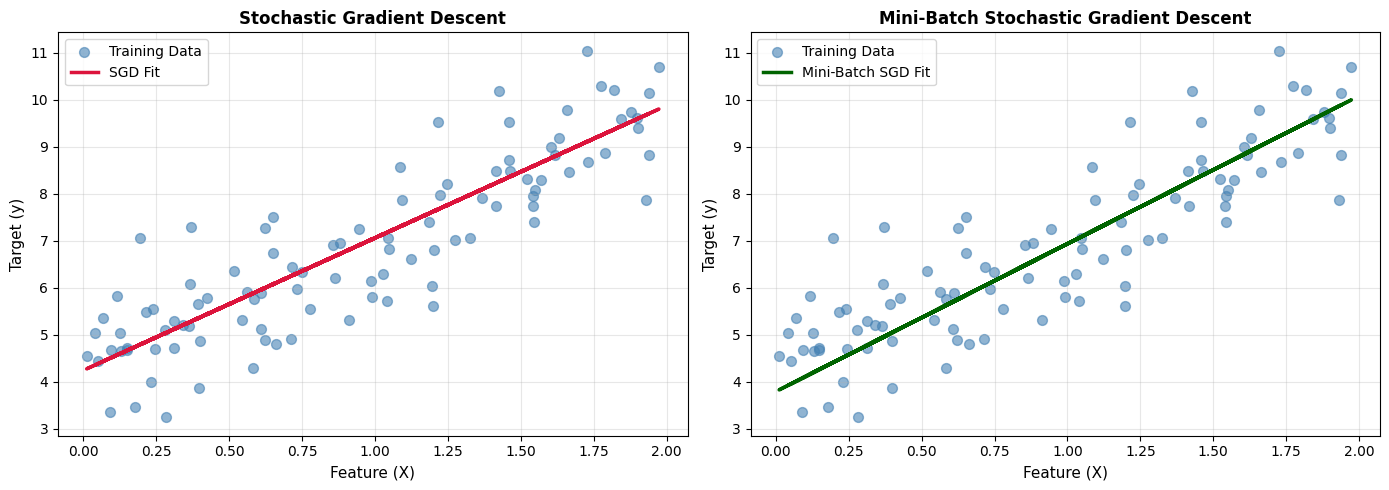


SUMMARY
✓ Both models trained on 100 samples
✓ SGD: Updates after each sample
✓ Mini-Batch SGD: Updates after every 10 samples
✓ True relationship: y = 3x + 4


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


class StochasticGradientDescentRegressor:
    def __init__(self, learning_rate=0.01, num_epochs=2000, convergence_threshold=1e-6):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.convergence_threshold = convergence_threshold
        self.weights = None
        self.bias = None
    
    def fit(self, features_matrix, target_values):
        num_samples, num_features = features_matrix.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for epoch_index in range(self.num_epochs):
            for sample_index in range(num_samples):
                feature_vector = features_matrix[sample_index]
                true_value = target_values[sample_index]
                predicted_value = np.dot(feature_vector, self.weights) + self.bias
                prediction_error = predicted_value - true_value
                
                self.weights -= self.learning_rate * prediction_error * feature_vector
                self.bias -= self.learning_rate * prediction_error
    
    def predict(self, features_matrix):
        return np.dot(features_matrix, self.weights) + self.bias


class MiniBatchStochasticGradientDescentRegressor:
    def __init__(self, learning_rate=0.01, num_epochs=50, batch_size=10):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
    
    def fit(self, features_matrix, target_values):
        num_samples, num_features = features_matrix.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for epoch_index in range(self.num_epochs):
            shuffled_indices = np.random.permutation(num_samples)
            features_shuffled = features_matrix[shuffled_indices]
            targets_shuffled = target_values[shuffled_indices]
            
            for batch_start in range(0, num_samples, self.batch_size):
                batch_end = batch_start + self.batch_size
                features_batch = features_shuffled[batch_start:batch_end]
                targets_batch = targets_shuffled[batch_start:batch_end]
                
                predictions_batch = np.dot(features_batch, self.weights) + self.bias
                batch_errors = predictions_batch - targets_batch
                
                weight_gradient = np.dot(features_batch.T, batch_errors) / len(features_batch)
                bias_gradient = np.mean(batch_errors)
                
                self.weights -= self.learning_rate * weight_gradient
                self.bias -= self.learning_rate * bias_gradient
    
    def predict(self, features_matrix):
        return np.dot(features_matrix, self.weights) + self.bias


np.random.seed(42)
features_train = 2 * np.random.rand(100, 1)
targets_train = 3 * features_train.flatten() + 4 + np.random.randn(100)

sgd_model = StochasticGradientDescentRegressor(learning_rate=0.01, num_epochs=50)
sgd_model.fit(features_train, targets_train)

minibatch_model = MiniBatchStochasticGradientDescentRegressor(learning_rate=0.01, num_epochs=50, batch_size=10)
minibatch_model.fit(features_train, targets_train)

features_test = np.array([[0], [1], [2]])

predictions_sgd = sgd_model.predict(features_test)
predictions_minibatch = minibatch_model.predict(features_test)

print("="*70)
print("STOCHASTIC GRADIENT DESCENT VS MINI-BATCH SGD COMPARISON")
print("="*70)

print("\n" + "="*70)
print("MODEL PARAMETERS")
print("="*70)
print(f"\nSGD Model:")
print(f"  Weight: {sgd_model.weights[0]:.4f}")
print(f"  Bias: {sgd_model.bias:.4f}")
print(f"  Equation: y = {sgd_model.weights[0]:.3f}x + {sgd_model.bias:.3f}")

print(f"\nMini-Batch SGD Model:")
print(f"  Weight: {minibatch_model.weights[0]:.4f}")
print(f"  Bias: {minibatch_model.bias:.4f}")
print(f"  Equation: y = {minibatch_model.weights[0]:.3f}x + {minibatch_model.bias:.3f}")

print("\n" + "="*70)
print("PREDICTIONS WITH SGD")
print("="*70)
for idx, feature_value in enumerate(features_test):
    print(f"Input: {feature_value[0]:.1f}, Predicted output: {predictions_sgd[idx]:.2f}")

print("\n" + "="*70)
print("PREDICTIONS WITH MINI-BATCH SGD")
print("="*70)
for idx, feature_value in enumerate(features_test):
    print(f"Input: {feature_value[0]:.1f}, Predicted output: {predictions_minibatch[idx]:.2f}")

train_predictions_sgd = sgd_model.predict(features_train)
train_predictions_minibatch = minibatch_model.predict(features_train)

mse_sgd = mean_squared_error(targets_train, train_predictions_sgd)
r2_sgd = r2_score(targets_train, train_predictions_sgd)

mse_minibatch = mean_squared_error(targets_train, train_predictions_minibatch)
r2_minibatch = r2_score(targets_train, train_predictions_minibatch)

print("\n" + "="*70)
print("TRAINING METRICS")
print("="*70)
print(f"\nSGD Model:")
print(f"  Mean Squared Error: {mse_sgd:.4f}")
print(f"  R² Score: {r2_sgd:.4f}")

print(f"\nMini-Batch SGD Model:")
print(f"  Mean Squared Error: {mse_minibatch:.4f}")
print(f"  R² Score: {r2_minibatch:.4f}")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(features_train, targets_train, color='steelblue', alpha=0.6, s=50, label='Training Data')
plt.plot(features_train, train_predictions_sgd, color='crimson', linewidth=2.5, label='SGD Fit')
plt.xlabel('Feature (X)', fontsize=11)
plt.ylabel('Target (y)', fontsize=11)
plt.title('Stochastic Gradient Descent', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(features_train, targets_train, color='steelblue', alpha=0.6, s=50, label='Training Data')
plt.plot(features_train, train_predictions_minibatch, color='darkgreen', linewidth=2.5, label='Mini-Batch SGD Fit')
plt.xlabel('Feature (X)', fontsize=11)
plt.ylabel('Target (y)', fontsize=11)
plt.title('Mini-Batch Stochastic Gradient Descent', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"✓ Both models trained on {len(features_train)} samples")
print(f"✓ SGD: Updates after each sample")
print(f"✓ Mini-Batch SGD: Updates after every {minibatch_model.batch_size} samples")
print(f"✓ True relationship: y = 3x + 4")
print("="*70)

## EXP - 7

In [1]:
import nltk
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


Processed sentences: [['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'], ['dog', 'sleeps', 'peacefully']]
Vocab size: 8, Training pairs: 9
Epoch 1, Loss: 52.0998
Epoch 2, Loss: 52.0454
Epoch 3, Loss: 51.9912
Epoch 4, Loss: 51.9374
Epoch 5, Loss: 51.8838
Epoch 6, Loss: 51.8307
Epoch 7, Loss: 51.7780
Epoch 8, Loss: 51.7258
Epoch 9, Loss: 51.6741
Epoch 10, Loss: 51.6229
Predicted context for 'quick': ['sleeps', 'brown', 'dog']


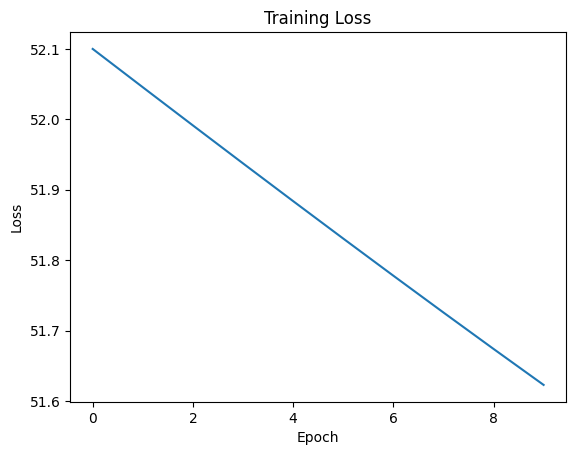

In [1]:
import numpy as np
import string
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')

def compute_softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

class SkipGramModel:
    def __init__(self, embedding_dim=10, context_window=2, learning_rate=0.001):
        self.embedding_dim = embedding_dim
        self.context_window = context_window
        self.learning_rate = learning_rate
        self.center_vectors = []
        self.context_vectors = []
        self.vocabulary = []
        self.word_to_idx = {}
        self.vocab_size = 0
        self.input_weights = None
        self.output_weights = None
    
    def setup(self, vocab_size, vocab_list):
        self.vocab_size = vocab_size
        self.input_weights = np.random.uniform(-0.8, 0.8, (vocab_size, self.embedding_dim))
        self.output_weights = np.random.uniform(-0.8, 0.8, (self.embedding_dim, vocab_size))
        self.vocabulary = vocab_list
        for idx, token in enumerate(vocab_list):
            self.word_to_idx[token] = idx
    
    def forward_pass(self, input_vector):
        self.hidden = np.dot(self.input_weights.T, input_vector).reshape(self.embedding_dim, 1)
        self.scores = np.dot(self.output_weights.T, self.hidden)
        self.probabilities = compute_softmax(self.scores)
        return self.probabilities
    
    def backward_pass(self, input_vec, target_vec):
        error = self.probabilities - np.asarray(target_vec).reshape(self.vocab_size, 1)
        grad_output = np.dot(self.hidden, error.T)
        input_reshaped = np.array(input_vec).reshape(self.vocab_size, 1)
        grad_input = np.dot(input_reshaped, np.dot(self.output_weights, error).T)
        self.output_weights -= self.learning_rate * grad_output
        self.input_weights -= self.learning_rate * grad_input
    
    def fit(self, num_epochs=10):
        loss_history = []
        for epoch_num in range(1, num_epochs + 1):
            self.total_loss = 0
            for idx in range(len(self.center_vectors)):
                self.forward_pass(self.center_vectors[idx])
                self.backward_pass(self.center_vectors[idx], self.context_vectors[idx])
                num_context = sum(self.context_vectors[idx])
                for vocab_idx in range(self.vocab_size):
                    if self.context_vectors[idx][vocab_idx]:
                        self.total_loss -= self.scores[vocab_idx][0]
                self.total_loss += num_context * np.log(np.sum(np.exp(self.scores)))
            loss_history.append(self.total_loss)
            print(f"Epoch {epoch_num}, Loss: {self.total_loss:.4f}")
            self.learning_rate *= 1 / (1 + self.learning_rate * epoch_num)
        return loss_history
    
    def get_predictions(self, target_word, top_k=5):
        if target_word not in self.word_to_idx:
            return "Word not in vocabulary."
        word_idx = self.word_to_idx[target_word]
        input_vec = np.zeros(self.vocab_size)
        input_vec[word_idx] = 1
        output_probs = self.forward_pass(input_vec)
        prob_dict = {prob: idx for idx, prob in enumerate(output_probs.flatten())}
        top_words = [self.vocabulary[prob_dict[k]] for k in sorted(prob_dict, reverse=True)[:top_k]]
        return top_words

def clean_text(text):
    stop_words_set = set(stopwords.words('english'))
    sentence_list = [s.strip() for s in text.split('.') if s.strip()]
    processed_data = []
    for sent in sentence_list:
        tokens = sent.split()
        filtered = [token.strip(string.punctuation).lower() for token in tokens if token.lower() not in stop_words_set]
        processed_data.append([w for w in filtered if w])
    return processed_data

def build_training_pairs(sentence_list, model):
    word_counts = {}
    for sent in sentence_list:
        for token in sent:
            word_counts[token] = word_counts.get(token, 0) + 1
    sorted_vocab = sorted(word_counts.keys())
    vocab_length = len(sorted_vocab)
    vocab_mapping = {token: idx for idx, token in enumerate(sorted_vocab)}
    model.setup(vocab_length, sorted_vocab)
    for sent in sentence_list:
        for pos, center_word in enumerate(sent):
            center_encoding = np.zeros(vocab_length)
            center_encoding[vocab_mapping[center_word]] = 1
            context_encoding = np.zeros(vocab_length)
            for context_pos in range(max(0, pos - model.context_window), min(len(sent), pos + model.context_window + 1)):
                if pos != context_pos:
                    context_encoding[vocab_mapping[sent[context_pos]]] = 1
            model.center_vectors.append(center_encoding)
            model.context_vectors.append(context_encoding)
    return model.center_vectors, model.context_vectors

if __name__ == "__main__":
    text_corpus = "The quick brown fox jumps over the lazy dog. The dog sleeps peacefully."
    processed_sentences = clean_text(text_corpus)
    print("Processed sentences:", processed_sentences)
    
    model = SkipGramModel()
    build_training_pairs(processed_sentences, model)
    print(f"Vocab size: {model.vocab_size}, Training pairs: {len(model.center_vectors)}")
    
    loss_values = model.fit(num_epochs=10)
    
    context_predictions = model.get_predictions("quick", top_k=3)
    print(f"Predicted context for 'quick': {context_predictions}")
    
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

## EXP - 11

Vocabulary size: 34, Text length: 1490

Training model...
Epoch 1/20 - loss: 3.3923 - val_loss: 2.9947
Epoch 2/20 - loss: 3.0568 - val_loss: 2.9860
Epoch 3/20 - loss: 3.0299 - val_loss: 2.9530
Epoch 4/20 - loss: 3.0157 - val_loss: 2.9457
Epoch 5/20 - loss: 3.0144 - val_loss: 2.9368
Epoch 6/20 - loss: 3.0140 - val_loss: 2.9393
Epoch 7/20 - loss: 3.0100 - val_loss: 2.9471
Epoch 8/20 - loss: 3.0016 - val_loss: 2.9382
Epoch 9/20 - loss: 3.0041 - val_loss: 2.9417
Epoch 10/20 - loss: 3.0006 - val_loss: 2.9346
Epoch 11/20 - loss: 2.9975 - val_loss: 2.9353
Epoch 12/20 - loss: 2.9889 - val_loss: 2.9190
Epoch 13/20 - loss: 2.9733 - val_loss: 2.9021
Epoch 14/20 - loss: 2.9352 - val_loss: 2.8464
Epoch 15/20 - loss: 2.8954 - val_loss: 2.7900
Epoch 16/20 - loss: 2.8379 - val_loss: 2.7606
Epoch 17/20 - loss: 2.7910 - val_loss: 2.6870
Epoch 18/20 - loss: 2.7057 - val_loss: 2.6524
Epoch 19/20 - loss: 2.6370 - val_loss: 2.6112
Epoch 20/20 - loss: 2.5707 - val_loss: 2.5505

Generated text:
to be or not t

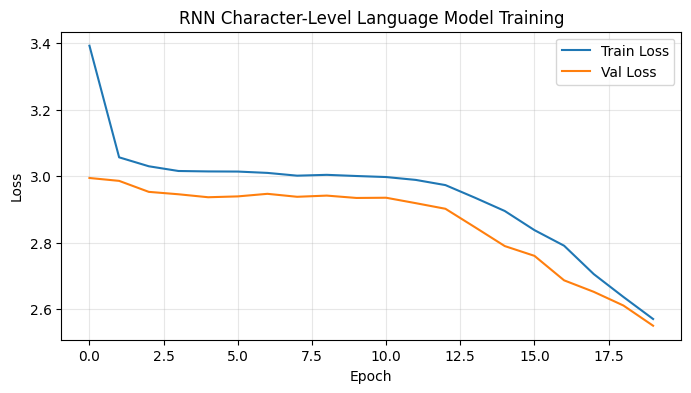

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt


text = """
To be, or not to be: that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles,
And by opposing end them? To die: to sleep;
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to, 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep: perchance to dream: ay, there's the rub;
For in that sleep of death what dreams may come
When we have shuffled off this mortal coil,
Must give us pause: there's the respect
That makes calamity of so long life;
For who would bear the whips and scorns of time,
The oppressor's wrong, the proud man's contumely,
The pangs of despised love, the law's delay,
The insolence of office and the spurns
That patient merit of the unworthy takes,
When he himself might his quietus make
With a bare bodkin? who would fardels bear,
To grunt and sweat under a weary life,
But that the dread of something after death,
The undiscover'd country from whose bourn
No traveller returns, puzzles the will
And makes us rather bear those ills we have
Than fly to others that we know not of?
Thus conscience does make cowards of us all;
And thus the native hue of resolution
Is sicklied o'er with the pale cast of thought,
And enterprises of great pith and moment
With this regard their currents turn awry,
And lose the name of action.--Soft you now!
The fair Ophelia! Nymph, in thy orisons
Be all my sins remember'd.
"""

text = text.lower()
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}
vocab_size = len(chars)

print(f"Vocabulary size: {vocab_size}, Text length: {len(text)}")

seq_length = 100
X, y = [], []
for i in range(len(text) - seq_length):
    seq_in = text[i:i+seq_length]
    seq_out = text[i+seq_length]
    X.append([char_to_int[c] for c in seq_in])
    y.append(char_to_int[seq_out])

X = np.array(X)
y = np.array(y)


class TextDataset(Dataset):
    def __init__(self, X, y, vocab_size):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)
        self.vocab_size = vocab_size
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x_onehot = torch.zeros(seq_length, self.vocab_size)
        x_onehot[torch.arange(seq_length), self.X[idx]] = 1
        return x_onehot, self.y[idx]


dataset = TextDataset(X, y, vocab_size)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)


class CharLSTM(nn.Module):
    def __init__(self, vocab_size, seq_length):
        super(CharLSTM, self).__init__()
        self.lstm1 = nn.LSTM(vocab_size, 256, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(256, 256, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.fc = nn.Linear(256, vocab_size)
        
    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.dropout1(out)
        out, _ = self.lstm2(out)
        out = self.dropout2(out)
        out = out[:, -1, :]
        out = self.fc(out)
        return out


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CharLSTM(vocab_size, seq_length).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

num_epochs = 20
train_losses = []
val_losses = []

print("\nTraining model...")
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    epoch_val_loss = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()
    
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - loss: {avg_train_loss:.4f} - val_loss: {avg_val_loss:.4f}")


def generate_text(model, seed_text, gen_length=500, temperature=1.0):
    model.eval()
    generated = seed_text
    
    with torch.no_grad():
        for _ in range(gen_length):
            if len(generated) < seq_length:
                padding_length = seq_length - len(generated)
                padded_seed = [0] * padding_length + [char_to_int[c] for c in generated]
            else:
                padded_seed = [char_to_int[c] for c in generated[-seq_length:]]
            
            x = torch.zeros(1, seq_length, vocab_size).to(device)
            for i, char_idx in enumerate(padded_seed):
                x[0, i, char_idx] = 1
            
            preds = model(x)[0]
            preds = preds / temperature
            probs = torch.softmax(preds, dim=0).cpu().numpy()
            next_idx = np.random.choice(vocab_size, p=probs)
            generated += int_to_char[next_idx]
    
    return generated


seed = "to be or not to be"
generated = generate_text(model, seed, 500, temperature=0.8)
print(f"\nGenerated text:\n{generated}")

plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Character-Level Language Model Training')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## EXP - 12

/Users/Gauransh/Library/Python/3.12/lib/python/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


Epoch 1/15 - loss: 1.5913 - accuracy: 0.1250
Epoch 2/15 - loss: 1.5546 - accuracy: 0.5000
Epoch 3/15 - loss: 1.5183 - accuracy: 0.8750
Epoch 4/15 - loss: 1.4822 - accuracy: 0.8750
Epoch 5/15 - loss: 1.4463 - accuracy: 0.8750
Epoch 6/15 - loss: 1.4106 - accuracy: 1.0000
Epoch 7/15 - loss: 1.3747 - accuracy: 1.0000
Epoch 8/15 - loss: 1.3388 - accuracy: 1.0000
Epoch 9/15 - loss: 1.3027 - accuracy: 1.0000
Epoch 10/15 - loss: 1.2664 - accuracy: 1.0000
Epoch 11/15 - loss: 1.2297 - accuracy: 1.0000
Epoch 12/15 - loss: 1.1926 - accuracy: 1.0000
Epoch 13/15 - loss: 1.1552 - accuracy: 1.0000
Epoch 14/15 - loss: 1.1173 - accuracy: 1.0000
Epoch 15/15 - loss: 1.0791 - accuracy: 1.0000


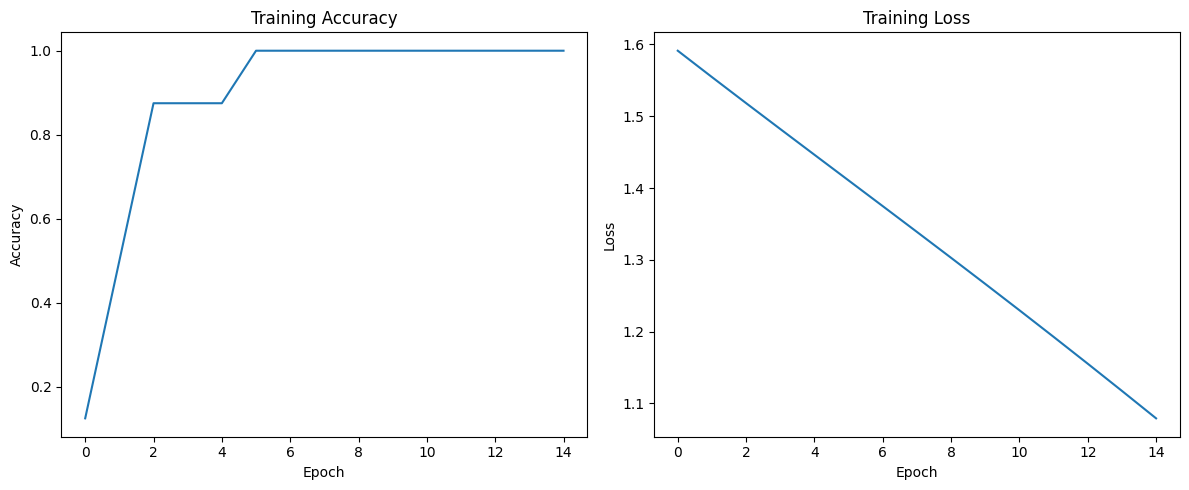

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


sentences = [
    ['John', 'lives', 'in', 'New', 'York'],
    ['Mary', 'works', 'for', 'Google'],
]
tags = [
    ['B-PER', 'O', 'O', 'B-LOC', 'I-LOC'],
    ['B-PER', 'O', 'O', 'B-ORG'],
]

words = list({w for s in sentences for w in s})
tags_set = list({t for ts in tags for t in ts})

word2idx = {w: i+2 for i, w in enumerate(words)}
word2idx['PAD'] = 0
word2idx['UNK'] = 1
tag2idx = {t: i for i, t in enumerate(tags_set)}
idx2tag = {i: t for t, i in tag2idx.items()}

max_len = max(len(s) for s in sentences)

X = [[word2idx.get(w, word2idx['UNK']) for w in s] for s in sentences]
X = [torch.tensor(seq + [0] * (max_len - len(seq))) for seq in X]
X = torch.stack(X)

y = [[tag2idx[t] for t in ts] for ts in tags]
y = [torch.tensor(seq + [0] * (max_len - len(seq))) for seq in y]
y = torch.stack(y)


class NERDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


dataset = NERDataset(X, y)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


class BiLSTMNER(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout=0.1):
        super(BiLSTMNER, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, 
                              bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.bilstm(embedded)
        output = self.fc(lstm_out)
        return output


embedding_dim = 50
lstm_units = 50
vocab_size = len(word2idx)
num_tags = len(tags_set)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMNER(vocab_size, embedding_dim, lstm_units, num_tags).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters())

num_epochs = 15
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        outputs_flat = outputs.view(-1, num_tags)
        labels_flat = labels.view(-1)
        
        loss = criterion(outputs_flat, labels_flat)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
        _, predicted = torch.max(outputs, 2)
        mask = labels != 0
        correct += ((predicted == labels) & mask).sum().item()
        total += mask.sum().item()
    
    avg_loss = epoch_loss / len(dataloader)
    accuracy = correct / total if total > 0 else 0
    
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs} - loss: {avg_loss:.4f} - accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

## EXP - 13

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence


input_texts = [
    "hello", "how are you", "good morning", "thank you", "good night"
]
target_texts = [
    "hola", "como estas", "buenos dias", "gracias", "buenas noches"
]


def build_vocab(texts, add_special=False):
    vocab = {'<pad>': 0}
    idx = 1
    if add_special:
        vocab['<start>'] = idx
        idx += 1
        vocab['<end>'] = idx
        idx += 1
    for text in texts:
        for word in text.split():
            if word not in vocab:
                vocab[word] = idx
                idx += 1
    return vocab

def texts_to_sequences(texts, vocab, add_special=False):
    sequences = []
    for text in texts:
        seq = []
        if add_special:
            seq.append(vocab['<start>'])
        seq.extend([vocab.get(word, 0) for word in text.split()])
        if add_special:
            seq.append(vocab['<end>'])
        sequences.append(seq)
    return sequences

input_vocab = build_vocab(input_texts)
target_vocab = build_vocab(target_texts, add_special=True)
inv_target_vocab = {v: k for k, v in target_vocab.items()}

input_sequences = texts_to_sequences(input_texts, input_vocab)
target_sequences = texts_to_sequences(target_texts, target_vocab, add_special=True)

max_encoder_len = max(len(seq) for seq in input_sequences)
max_decoder_len = max(len(seq) for seq in target_sequences)

encoder_input_data = [seq + [0] * (max_encoder_len - len(seq)) for seq in input_sequences]
decoder_input_data = [seq + [0] * (max_decoder_len - len(seq)) for seq in target_sequences]

encoder_input_data = torch.tensor(encoder_input_data, dtype=torch.long)
decoder_input_data = torch.tensor(decoder_input_data, dtype=torch.long)

num_encoder_tokens = len(input_vocab)
num_decoder_tokens = len(target_vocab)

decoder_target_data = torch.zeros(len(input_texts), max_decoder_len, num_decoder_tokens)
for i, seq in enumerate(target_sequences):
    for t in range(1, len(seq)):
        decoder_target_data[i, t-1, seq[t]] = 1.0


class Seq2SeqDataset(Dataset):
    def __init__(self, enc_data, dec_data, target_data):
        self.enc_data = enc_data
        self.dec_data = dec_data
        self.target_data = target_data
    
    def __len__(self):
        return len(self.enc_data)
    
    def __getitem__(self, idx):
        return self.enc_data[idx], self.dec_data[idx], self.target_data[idx]


dataset = Seq2SeqDataset(encoder_input_data, decoder_input_data, decoder_target_data)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


class Seq2SeqAttention(nn.Module):
    def __init__(self, num_encoder_tokens, num_decoder_tokens, embedding_dim=64, hidden_dim=64):
        super(Seq2SeqAttention, self).__init__()
        self.hidden_dim = hidden_dim
        
        self.encoder_embedding = nn.Embedding(num_encoder_tokens, embedding_dim, padding_idx=0)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        
        self.decoder_embedding = nn.Embedding(num_decoder_tokens, embedding_dim, padding_idx=0)
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        
        self.attention = nn.MultiheadAttention(hidden_dim, num_heads=1, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, num_decoder_tokens)
        
    def forward(self, enc_input, dec_input, enc_hidden=None):
        enc_embedded = self.encoder_embedding(enc_input)
        enc_outputs, (enc_h, enc_c) = self.encoder_lstm(enc_embedded)
        
        dec_embedded = self.decoder_embedding(dec_input)
        dec_outputs, _ = self.decoder_lstm(dec_embedded, (enc_h, enc_c))
        
        attn_output, _ = self.attention(dec_outputs, enc_outputs, enc_outputs)
        
        combined = torch.cat([dec_outputs, attn_output], dim=-1)
        output = self.fc(combined)
        
        return output, enc_outputs, enc_h, enc_c


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Seq2SeqAttention(num_encoder_tokens, num_decoder_tokens).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

num_epochs = 300

print("Training model...")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    
    for enc_inp, dec_inp, target in dataloader:
        enc_inp, dec_inp, target = enc_inp.to(device), dec_inp.to(device), target.to(device)
        
        optimizer.zero_grad()
        output, _, _, _ = model(enc_inp, dec_inp)
        
        output_flat = output.view(-1, num_decoder_tokens)
        target_flat = target.view(-1, num_decoder_tokens)
        target_indices = torch.argmax(target_flat, dim=1)
        
        loss = criterion(output_flat, target_indices)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
        _, predicted = torch.max(output, 2)
        mask = target_indices != 0
        correct += ((predicted.view(-1) == target_indices) & mask).sum().item()
        total += mask.sum().item()
    
    if (epoch + 1) % 50 == 0:
        avg_loss = epoch_loss / len(dataloader)
        accuracy = correct / total if total > 0 else 0
        print(f"Epoch {epoch+1}/{num_epochs} - loss: {avg_loss:.4f} - accuracy: {accuracy:.4f}")


def translate(sentence, model, input_vocab, target_vocab, inv_target_vocab, max_encoder_len, max_decoder_len, device):
    model.eval()
    
    words = sentence.split()
    seq = [input_vocab.get(word, 0) for word in words]
    seq = seq + [0] * (max_encoder_len - len(seq))
    enc_input = torch.tensor([seq], dtype=torch.long).to(device)
    
    with torch.no_grad():
        enc_embedded = model.encoder_embedding(enc_input)
        enc_outputs, (state_h, state_c) = model.encoder_lstm(enc_embedded)
    
    target_seq = torch.tensor([[target_vocab['<start>']]], dtype=torch.long).to(device)
    decoded_sentence = ''
    
    for _ in range(max_decoder_len):
        with torch.no_grad():
            dec_embedded = model.decoder_embedding(target_seq)
            dec_outputs, (state_h, state_c) = model.decoder_lstm(dec_embedded, (state_h, state_c))
            
            attn_output, _ = model.attention(dec_outputs, enc_outputs, enc_outputs)
            combined = torch.cat([dec_outputs, attn_output], dim=-1)
            output = model.fc(combined)
        
        sampled_token_index = torch.argmax(output[0, -1, :]).item()
        sampled_word = inv_target_vocab.get(sampled_token_index, '')
        
        if sampled_word == '<end>' or len(decoded_sentence.split()) > max_decoder_len:
            break
        elif sampled_word != '<pad>' and sampled_word != '<start>':
            decoded_sentence += ' ' + sampled_word
        
        target_seq = torch.tensor([[sampled_token_index]], dtype=torch.long).to(device)
    
    return decoded_sentence.strip()


print("\nTranslation Example:")
print("English: hello → Spanish:", translate("hello", model, input_vocab, target_vocab, inv_target_vocab, max_encoder_len, max_decoder_len, device))
print("English: good night → Spanish:", translate("good night", model, input_vocab, target_vocab, inv_target_vocab, max_encoder_len, max_decoder_len, device))

Training model...
Epoch 50/300 - loss: 0.0187 - accuracy: 1.0000
Epoch 100/300 - loss: 0.0050 - accuracy: 1.0000
Epoch 150/300 - loss: 0.0021 - accuracy: 1.0000
Epoch 200/300 - loss: 0.0011 - accuracy: 1.0000
Epoch 250/300 - loss: 0.0007 - accuracy: 1.0000
Epoch 300/300 - loss: 0.0005 - accuracy: 1.0000

Translation Example:
English: hello → Spanish: hola
English: good night → Spanish: buenas noches
